# Exercises
Do your work for this exercise in a file named `explore`.

In [1]:
import re
import unicodedata
import pandas as pd
import nltk

from env import user, password, host

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

import acquire as a
import prepare as p

## 1. Spam Data

### a. Load the spam data set.

In [2]:
sql = "SELECT * FROM spam"

df = a.get_data(sql, "spam_db").set_index('id')

In [3]:
df.head(2)

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [4]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [5]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [6]:
#creates lists of specified words

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [7]:
#creates a pd.Series of the value_counts of the list

ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [8]:
#creates a pd.DataFrame of the concated series of value_counts

word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [9]:
word_counts.head(2)

,all,ham,spam
0,3,0,3
008704050406,2,0,2


### b. Create and explore BIgrams for the spam data. 
- Visualize them with a word cloud. 
- How do they compare with the ham bigrams?

In [10]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head(20)

(please, call)          44
(customer, service)     27
(po, box)               24
(guaranteed, call)      23
(a1000, cash)           23
(prize, guaranteed)     22
(chance, win)           19
(await, collection)     19
(every, week)           19
(send, stop)            19
(selected, receive)     19
(urgent, mobile)        18
(land, line)            18
(valid, 12hrs)          17
(claim, call)           17
(account, statement)    16
(prize, claim)          16
(sae, tc)               16
(call, 08000930705)     16
(draw, show)            15
dtype: int64

In [11]:
#create a list of tuples in pd.Series index
top_20_spam_tuplelist = top_20_spam_bigrams.index.to_list()

In [12]:
#convert list of tuples to a list of all words in tuple list
top_20_spam_list = [word for t in top_20_spam_tuplelist for word in t]

(-0.5, 399.5, 199.5, -0.5)

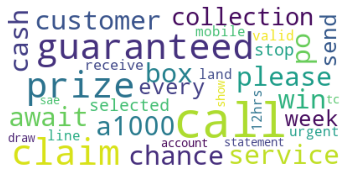

In [13]:
# use `' '.join()` to concat the list of spam words into a string to input

img = WordCloud(background_color='white').generate(' '.join(top_20_spam_list))

# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)

# axis aren't very useful for a word cloud
plt.axis('off')

In [14]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head(20)

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(hi, hi)           18
(wat, time)        18
(last, night)      18
(great, day)       17
(dont, want)       15
(send, message)    15
dtype: int64

In [15]:
#create a list of tuples in pd.Series index
top_20_ham_tuplelist = top_20_ham_bigrams.index.to_list()

In [16]:
#convert list of tuples to a list of all words in tuple list
top_20_ham_list = [word for t in top_20_ham_tuplelist for word in t]

(-0.5, 399.5, 199.5, -0.5)

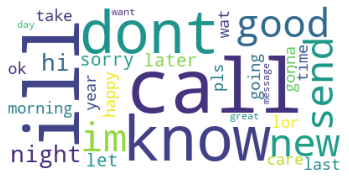

In [17]:
# use `' '.join()` to concat the list of spam words into a string to input

img = WordCloud(background_color='white').generate(' '.join(top_20_ham_list))

# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)

# axis aren't very useful for a word cloud
plt.axis('off')

### c. Is there any overlap in the bigrams for the spam data and the ham data?

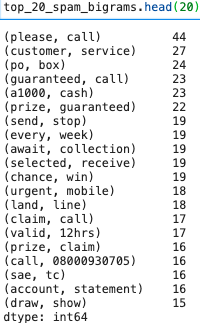 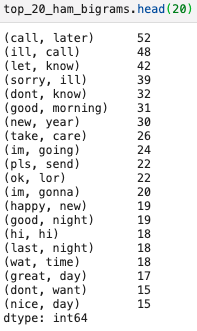







In [18]:
#spam_cloud = WordCloud(background_color='white').generate(' '.join(top_20_spam_list))
#ham_cloud = WordCloud(background_color='white').generate(' '.join(top_20_ham_list))
#
#fig = plt.figure(figsize=(10, 8))
#
#fig, ax = plt.subplots()
#
#ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)
#
#ax1.imshow(spam_cloud)
#ax2.imshow(ham_cloud)
#
#ax1.set_title('Spam')
#
#ax2.set_title('Ham')
#plt.axis('off')

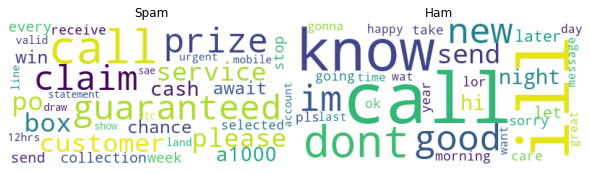

In [19]:
spam_cloud = WordCloud(background_color='white').generate(' '.join(top_20_spam_list))
ham_cloud = WordCloud(background_color='white').generate(' '.join(top_20_ham_list))

plt.figure(figsize=(8, 8))
axs = [plt.axes([.5, 1, .5, 1]), plt.axes([1, 1, .5, 1])]


axs[0].imshow(spam_cloud)
axs[1].imshow(ham_cloud)


axs[0].set_title('Spam')
axs[1].set_title('Ham')

for ax in axs: ax.axis('off')

In [20]:
[x for x in top_20_ham_list if x in top_20_spam_list]

['call', 'call', 'send', 'send']

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [21]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams.head(20)

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(reply, call, 08000930705)             14
(2003, account, statement)             13
(private, 2003, account)               13
(guaranteed, a1000, cash)              12
(camcorder, reply, call)               12
(show, 800, unredeemed)                12
(tone, 4, ur)                          11
(bonus, caller, prize)                 11
(every, week, txt)                     11
(urgent, trying, contact)              11
(please, call, customer)               11
(anytime, network, min)                11
(a2000, bonus, caller)                 10
(customer, service, representative)    10
(cash, await, collection)              10
(speak, live, operator)                10
(unredeemed, point, call)               9
dtype: int64

In [22]:
#create a list of tuples in pd.Series index
top20_spam_tri_tuplelist = top_20_spam_trigrams.index.to_list()

In [23]:
#convert list of tuples to a list of all words in tuple list
top20_spam_tri_list = [word for t in top20_spam_tri_tuplelist for word in t]

In [24]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams.head(20)

(ill, call, later)             42
(sorry, ill, call)             38
(happy, new, year)             19
(pls, send, message)           13
(pick, phone, right)           12
(right, pls, send)             12
(cant, pick, phone)            12
(phone, right, pls)            12
(hi, hi, hi)                   11
(x, x, x)                       8
(good, morning, dear)           7
(pls, convey, birthday)         6
(call, later, meeting)          6
(convey, birthday, wish)        6
(kiss, across, sea)             6
(even, colleague, wish)         5
(last, week, bday)              5
(callertune, caller, press)     5
(wife, didnt, wish)             5
(parent, forgot, n)             5
dtype: int64

In [25]:
#create a list of tuples in pd.Series index
top20_ham_tri_tuplelist = top_20_ham_trigrams.index.to_list()

In [26]:
#convert list of tuples to a list of all words in tuple list
top20_ham_tri_list = [word for t in top20_ham_tri_tuplelist for word in t]

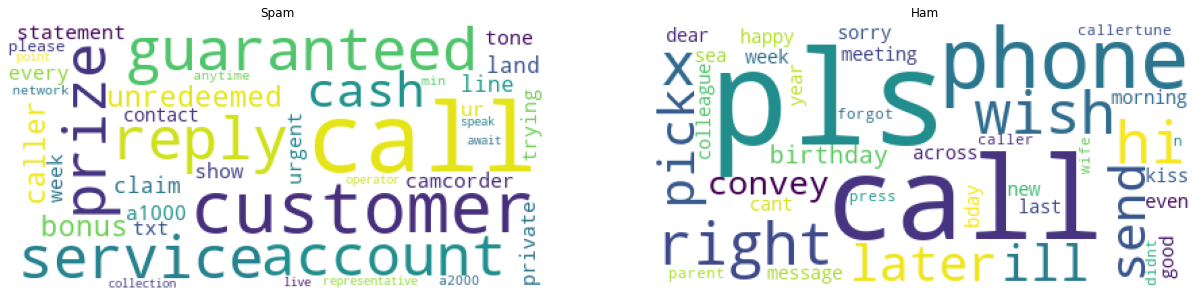

In [55]:
spam_cloud = WordCloud(background_color='white').generate(' '.join(top20_spam_tri_list))
ham_cloud = WordCloud(background_color='white').generate(' '.join(top20_ham_tri_list))

plt.figure(figsize=(15, 15))
axs = [plt.axes([.4, 1, .5, 1]), plt.axes([1, 1, .5, 1])]


axs[0].imshow(spam_cloud)
axs[1].imshow(ham_cloud)


axs[0].set_title('Spam')
axs[1].set_title('Ham')

for ax in axs: ax.axis('off')

In [28]:
[x for x in top20_spam_tri_list if x in top20_ham_tri_list]

['call', 'call', 'call', 'call', 'caller', 'week', 'call', 'caller', 'call']

## 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [29]:
codeup_df = a.convert_to_df()
codeup_df.head(2)

,title,date posted,category,content
0,Codeup’s Data Science Career Accelerator is Here!,"Posted on September 30, 2018",In Data Science,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,"Posted on October 31, 2018",In Data Science,By Dimitri Antoniou and Maggie Giust\nData Sci...


In [30]:
cols = "date posted"
codeup_df = p.remove_columns(codeup_df, cols)

In [31]:

def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

In [32]:
show_counts_and_ratios(codeup_df, "category")

,n,percent
In Data Science,3,0.6
In Tips for Prospective Students,1,0.2
In Codeup News,1,0.2


In [36]:
# seperate the data into seperate pieces 

ds_words = clean(' '.join(codeup_df[codeup_df.category == 'In Data Science'].content))
pstu_words = clean(' '.join(codeup_df[codeup_df.category == 'In Tips for Prospective Students'].content))
cunews_words = clean(' '.join(codeup_df[codeup_df.category == 'In Codeup News'].content))
all_words = clean(' '.join(codeup_df.content))

In [37]:
ds_freq = pd.Series(ds_words).value_counts()
pstu_freq = pd.Series(pstu_words).value_counts()
cunews_freq = pd.Series(cunews_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [38]:
word_counts = (pd.concat([all_freq, ds_freq, pstu_freq, cunews_freq], axis=1, sort=True)
                .set_axis(['all', 'DS', 'prospective_student', 'codeup_news'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [40]:
word_counts.tail()

,all,DS,prospective_student,codeup_news
wrote,1,1,0,0
yard,3,0,0,3
year,1,1,0,0
york,1,1,0,0
youll,3,1,2,0


Text(0.5, 1.0, 'Proportion of Data Science vs Codeup News for the 20 most common words')

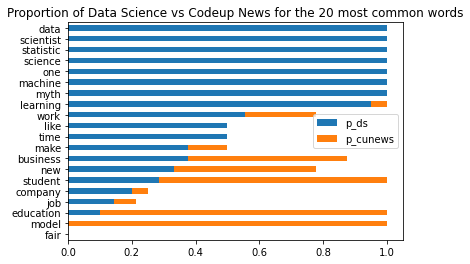

In [41]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_ds=word_counts.DS / word_counts['all'],
         p_cunews=word_counts.codeup_news / word_counts['all'])
 .sort_values(by='all')
 [['p_ds', 'p_cunews']]
 .tail(20)
 .sort_values('p_ds')
 .plot.barh(stacked=True))

plt.title('Proportion of Data Science vs Codeup News for the 20 most common words')

In [42]:
(word_counts
 [(word_counts.DS > 10) & (word_counts.codeup_news > 10)]
 .assign(ratio=lambda df: df.DS / (df.codeup_news + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all,DS,prospective_student,codeup_news,ratio


(-0.5, 399.5, 199.5, -0.5)

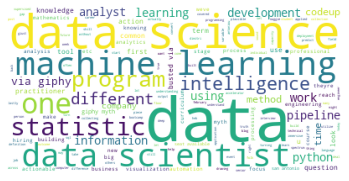

In [45]:
img = WordCloud(background_color='white').generate(' '.join(ds_words))
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

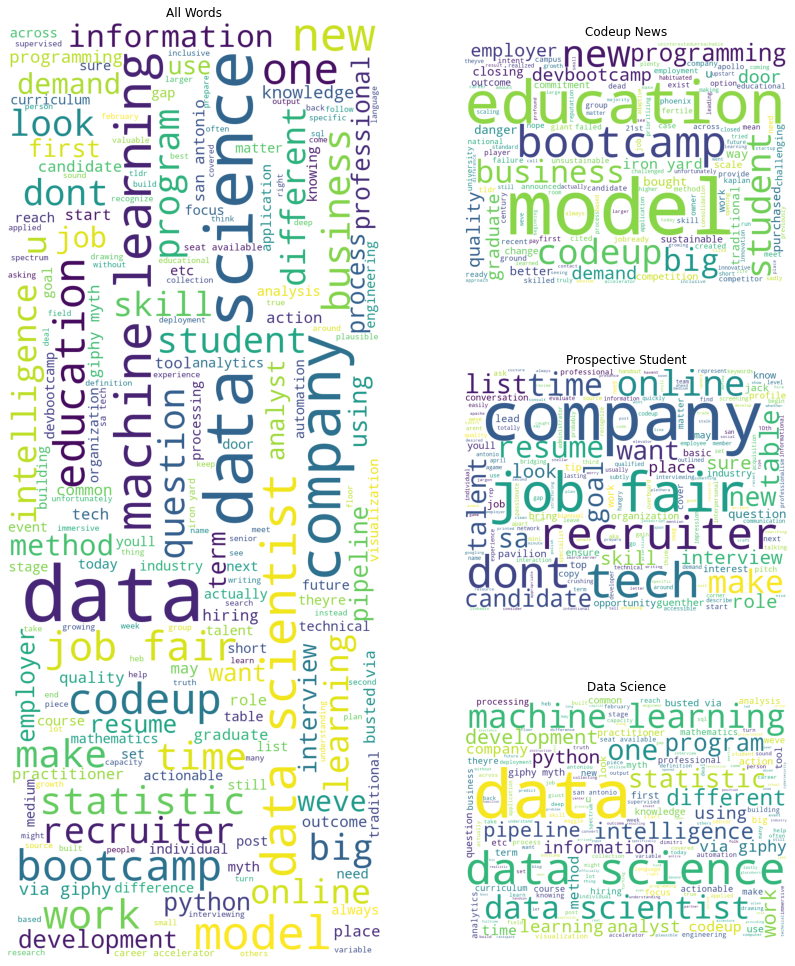

In [53]:
all_cloud = WordCloud(background_color='white', height=2000, width=800).generate(' '.join(all_words))
ds_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ds_words))
pstu_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(pstu_words))
cunews_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(cunews_words))

plt.figure(figsize=(15, 13))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, 0, .3, .3]), plt.axes([.5, .35, .3, .3]), plt.axes([.5, .7, .3, .3])]

axs[0].imshow(all_cloud)
axs[1].imshow(ds_cloud)
axs[2].imshow(pstu_cloud)
axs[3].imshow(cunews_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Data Science')
axs[2].set_title('Prospective Student')
axs[3].set_title('Codeup News')

for ax in axs: ax.axis('off')

In [56]:
top_20_ds_bigrams = (pd.Series(nltk.ngrams(ds_words, 2))
                      .value_counts()
                      .head(20))

top_20_ds_bigrams.head(10)

(data, science)         26
(machine, learning)     14
(data, scientist)       13
(via, giphy)             5
(intelligence, data)     4
(giphy, myth)            4
(busted, via)            4
(science, data)          3
(big, data)              3
(seat, available)        3
dtype: int64

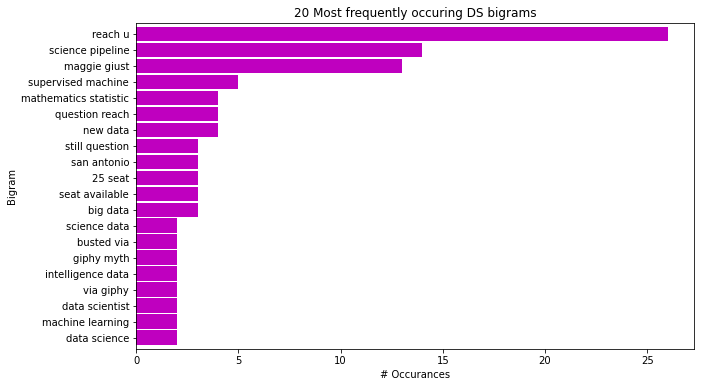

In [57]:
top_20_ds_bigrams.sort_values().plot.barh(color='m', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring DS bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ds_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1]) #handles the concatinating of the tuples
_ = plt.yticks(ticks, labels)

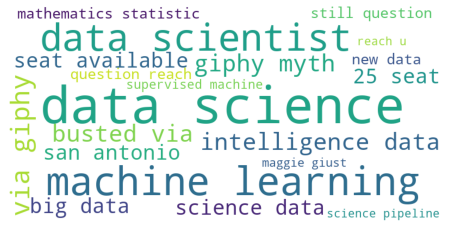

In [58]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ds_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

## 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.